# **TIME SERISE FORECASTING USING RNN**
This notebook focuses on training, and evaluation of neural network models for time-series data.

### **1. Loading the Dataset**

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orig = pd.read_csv('Train_Time_Series.csv', index_col='Date')

### **2. Exploratory Data Analysis**

In [3]:
df_orig.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,Trading Volume (Target Variable)
Date,,,,,,,,,,,,,,,,,,,,,
0,1.296695e+10,1.457547e+10,1.325288e+09,-2.655211e+10,2.101698e+10,-9.094024e+09,4.858148e+09,-2.356104e+09,-3.233936e+10,5.018100e+09,...,-1.644660e+10,9.440106e+09,1.541441e+10,1.119134e+10,4.934779e+09,-1.751067e+09,5.676475e+09,3.468865e+10,-2.065788e+10,7780059.06
1,1.296838e+10,1.457465e+10,1.328991e+09,-2.655095e+10,2.115096e+10,-9.086957e+09,4.913736e+09,-2.354550e+09,-3.234193e+10,5.018558e+09,...,-1.773644e+10,9.416437e+09,1.545443e+10,1.118869e+10,4.936015e+09,-1.749437e+09,5.694470e+09,3.467851e+10,-2.066140e+10,7454553.80
2,1.305118e+10,1.463240e+10,1.306612e+09,-2.651588e+10,2.114048e+10,-9.094517e+09,4.919696e+09,-2.304025e+09,-3.232356e+10,5.047141e+09,...,-1.761549e+10,9.425556e+09,1.552926e+10,1.119478e+10,4.963428e+09,-1.776820e+09,5.702848e+09,3.468841e+10,-2.067423e+10,29459968.91
3,1.381830e+10,1.516195e+10,1.151668e+09,-2.651554e+10,2.114120e+10,-9.052058e+09,4.983555e+09,-1.998877e+09,-3.232600e+10,5.303193e+09,...,-1.756951e+10,9.640630e+09,1.571777e+10,1.107390e+10,5.225323e+09,-2.073629e+09,5.731859e+09,3.500143e+10,-2.045206e+10,13630323.78
4,1.376322e+10,1.527571e+10,1.281023e+09,-2.670474e+10,2.122595e+10,-9.091410e+09,5.032221e+09,-2.144453e+09,-3.253045e+10,5.302928e+09,...,-1.753090e+10,9.775995e+09,1.571977e+10,1.129186e+10,5.128488e+09,-2.067993e+09,5.317616e+09,3.692245e+10,-2.049799e+10,9224729.90


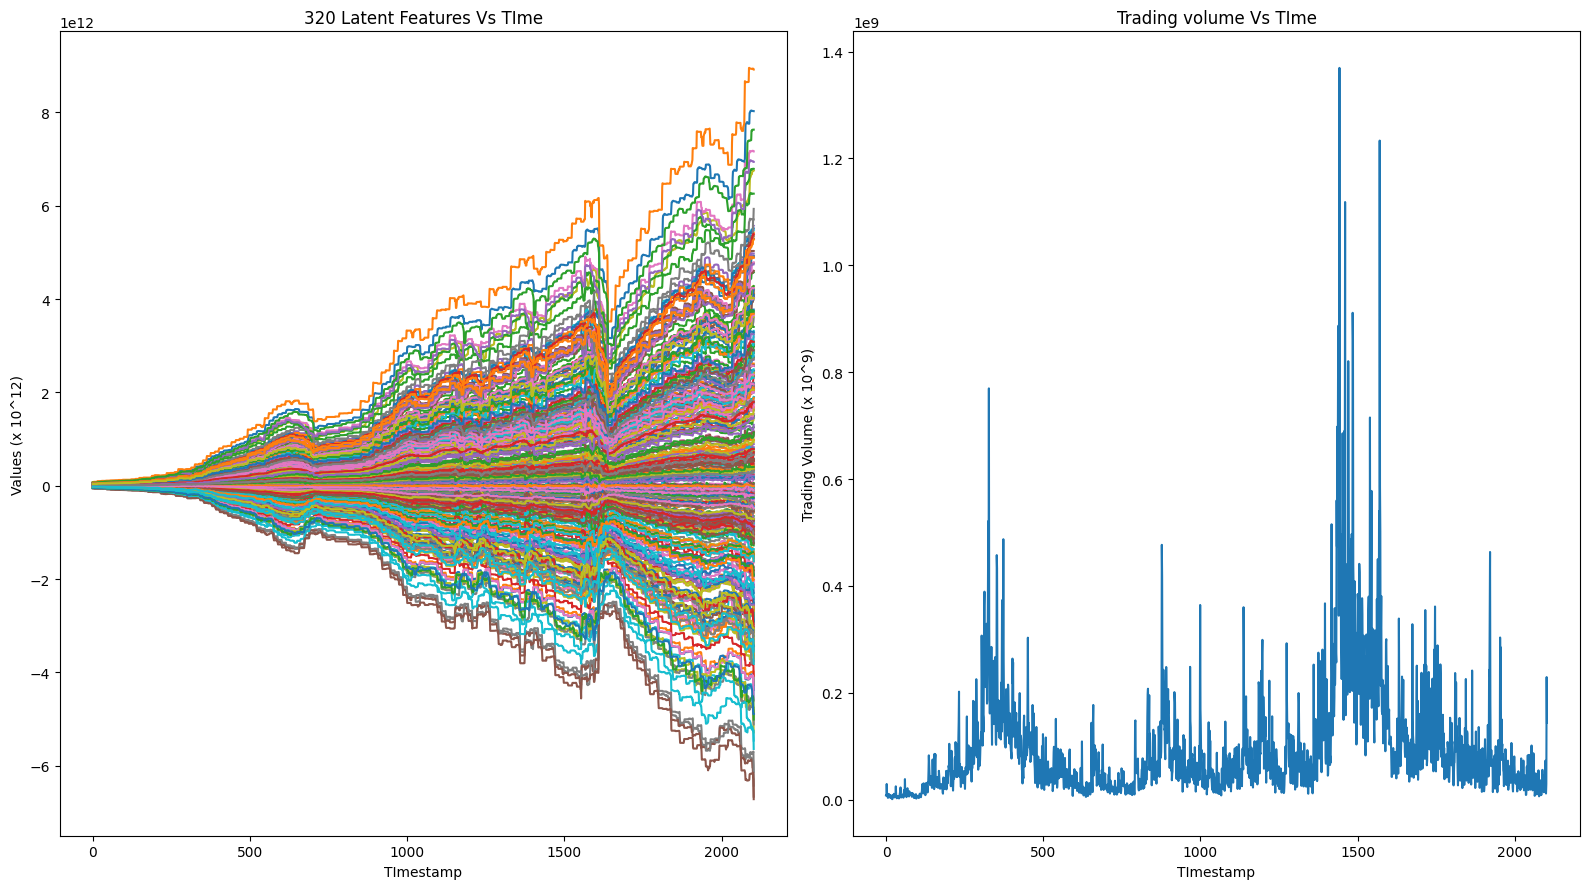

In [16]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 9))  # Adjust the figsize as needed

# Plot on the first subplot
axes[0].plot(df_orig.drop('Trading Volume (Target Variable)', axis=1))
axes[0].set_title('320 Latent Features Vs TIme')
axes[0].set_ylabel('Values (x 10^12)')
axes[0].set_xlabel('TImestamp')

# Plot on the second subplot
axes[1].plot(df_orig[['Trading Volume (Target Variable)']])
axes[1].set_title('Trading volume Vs TIme')
axes[1].set_ylabel('Trading Volume (x 10^9)')
axes[1].set_xlabel('TImestamp')

plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()


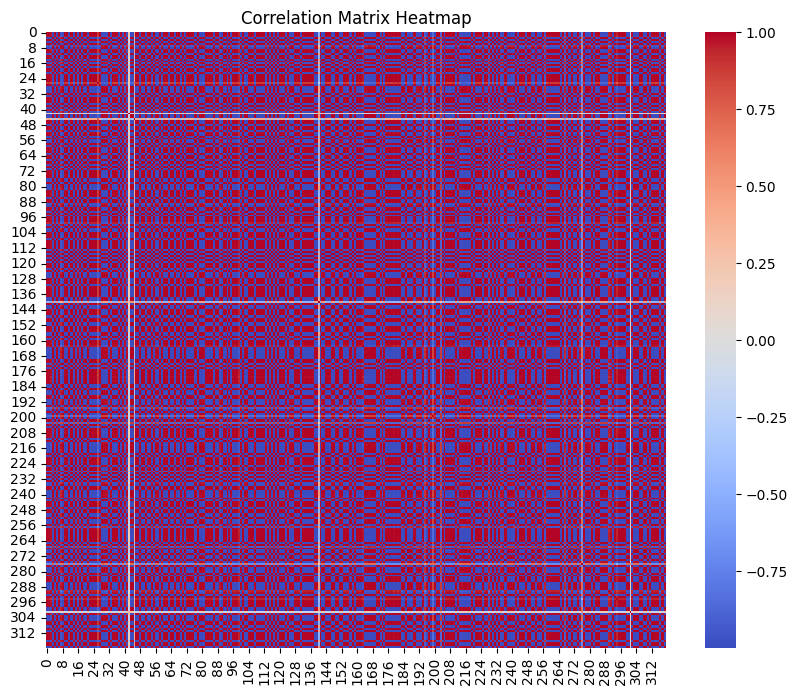

In [20]:
correlation_matrix = df_orig.drop('Trading Volume (Target Variable)', axis=1).corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

c:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


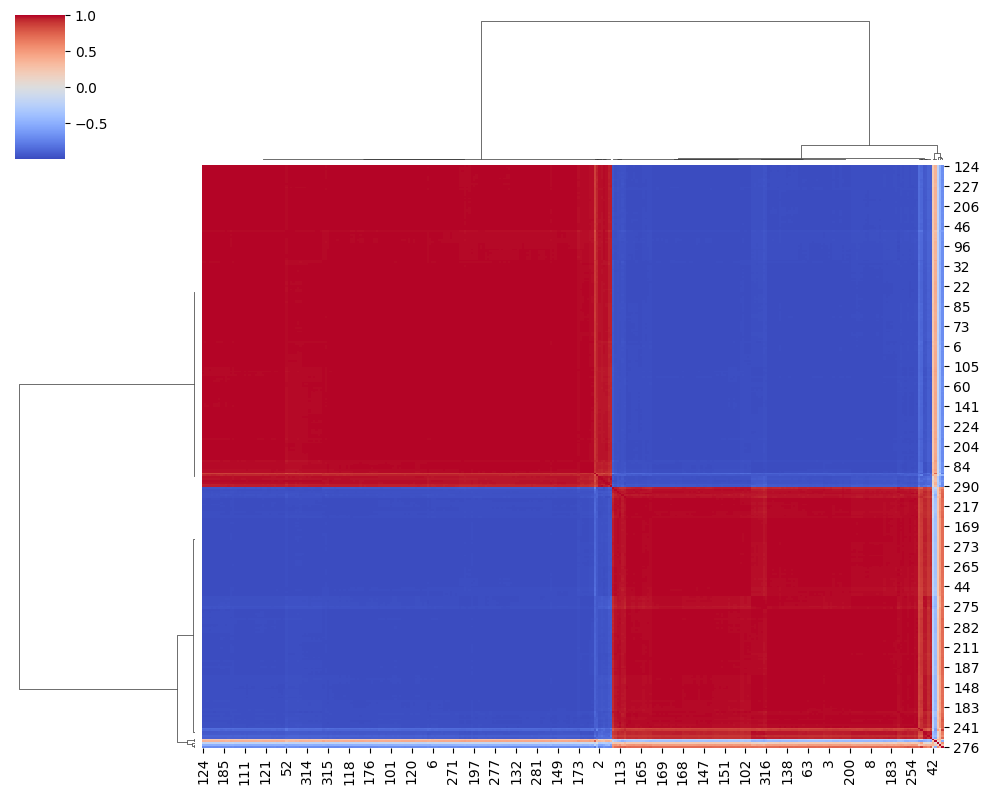

In [21]:
sns.clustermap(correlation_matrix, cmap="coolwarm", center=0, method="ward", figsize=(10, 8))
plt.show()

### **3. Scaling**
The cell below scales the data.
I have used standard scaler and defined two independent scales, one for 320 features and one for the Target Variable 'Trading Volume (Target Variable)'. This eases the process of inverse transforming the predictions.

In [31]:
#IMPORTS
from sklearn.preprocessing import StandardScaler

In [32]:
sc1 = StandardScaler()  # Initialize the StandardScaler for scaling features
df_features = pd.DataFrame(sc1.fit_transform(df_orig.drop('Trading Volume (Target Variable)', axis=1)))

sc2 = StandardScaler()  # Initialize the StandardScaler for scaling the target variable
df_tgt = pd.DataFrame(sc2.fit_transform(df_orig[['Trading Volume (Target Variable)']]))

In [33]:
df_scaled = pd.concat([df_features, df_tgt], axis=1) # Concatenate the scaled features and the scaled target variiable
df_scaled.columns = df_orig.columns

In [34]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,Trading Volume (Target Variable)
0,-1.338752,-1.333884,-1.282212,1.323664,-1.330776,1.323066,-1.332204,1.282871,1.327727,-1.332913,...,1.319737,-1.325002,-1.332265,-1.321462,-1.329271,1.316974,-1.326475,-1.342173,1.315276,-0.795946
1,-1.338748,-1.333886,-1.282125,1.323665,-1.330571,1.323091,-1.331834,1.282893,1.327724,-1.332911,...,1.317308,-1.325078,-1.332180,-1.321469,-1.329263,1.317004,-1.326370,-1.342183,1.315271,-0.798817
2,-1.338546,-1.333756,-1.282649,1.323708,-1.330587,1.323064,-1.331794,1.283593,1.327743,-1.332725,...,1.317535,-1.325049,-1.332022,-1.321453,-1.329084,1.316501,-1.326322,-1.342173,1.315251,-0.604726
3,-1.336665,-1.332567,-1.286278,1.323709,-1.330586,1.323217,-1.331368,1.287819,1.327740,-1.331059,...,1.317622,-1.324358,-1.331622,-1.321776,-1.327374,1.311048,-1.326153,-1.341881,1.315603,-0.744346
4,-1.336800,-1.332312,-1.283248,1.323476,-1.330456,1.323075,-1.331044,1.285803,1.327533,-1.331061,...,1.317695,-1.323923,-1.331618,-1.321193,-1.328006,1.311151,-1.328557,-1.340087,1.315530,-0.783204


### **4. Batching the Data for Training**

In [40]:
from  sklearn.model_selection import train_test_split

In [41]:
def df_to_X_y(df, window_size=5):

  """
   Converts a DataFrame into a format suitable to feed the moedel for training

    This function transforms the input DataFrame into a set of input-output pairs.
    Each input consists of a sequence of `window_size` consecutive rows, and each output is the value from a specified column
    in the row immediately following the sequence.
    """

  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][-1]
    y.append(label)
  return np.array(X), np.array(y)

In [42]:
df_scaled.shape

(2103, 321)

In [43]:
X1, y1 = df_to_X_y(df_scaled)
X1.shape, y1.shape

((2098, 5, 321), (2098,))

In [ ]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, shuffle=False, train_size=0.7)
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape

((1468, 5, 321), (1468,), (630, 5, 321), (630,))

### **5. Model Setting, Training and Evaluation**
The section sets up basic neural network model using TensorFlow's Keras API.

In [ ]:
# Sequential model type and necessary layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, InputLayer

# ModelCheckpoint callback for saving model checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint

# Loss function and metrics for evaluation
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# Optimizers for training the model
from tensorflow.keras.optimizers import Adam

# L2 regularization to penalize large weights for preventing overfitting.
from tensorflow.keras.regularizers import l2

### Setting up the LSTM(64) model

In [50]:
# Define the model

model1 = Sequential()
model1.add(InputLayer((X1.shape[1], X1.shape[2])))
model1.add(LSTM(64, kernel_regularizer=l2(0.001)))
model1.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model1.add(Dense(1, activation='linear'))

# model1.add(LSTM(32, input_shape=(5, 321), return_sequences=True))
# model1.add(Dropout(0.5))          # Dropout with 50% rate
# model1.add(LSTM(32))              # LSTM layer with 64 units
# model1.add(Dense(8, 'relu'))      # Dense layer with 8 units and Relu activation function
# model1.add(Dropout(0.5))          # Another Dropout layer
# model1.add(Dense(1, 'linear'))    # Output layer with linear activation activation

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,345 (388.07 KB)

 Trainable params: 99,345 (388.07 KB)

 Non-trainable params: 0 (0.00 B)

Model Checkpoint and Compilation

ModelCheckpoint to retain the best performing model during training.  
It is crucial to prevent overfitting and ensure that the final model is the one with the best generalization performance.

In [62]:
# Setting up the ModelCheckpoint

from tensorflow.keras.callbacks import EarlyStopping
#cp1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cp1 = ModelCheckpoint('model1/model_checkpoint.keras', save_best_only=True)

# Compiling the model
model1.compile(
    loss=MeanSquaredError(), 
    optimizer=Adam(learning_rate=0.0008), 
    metrics=[RootMeanSquaredError()]
)

Training the Neural Network Model with Validation and Callbacks

Validation data helps monitor the model's performance on unseen data during training, preventing overfitting.  
ModelCheckpoint saves the model weights during training of the version that performs best on the validation dataset.

In [63]:
trained_model1 = model1.fit(
    X1_train, y1_train,
    validation_data=(X1_val, y1_val),
    epochs=30,
    callbacks=[cp1],
    verbose=True,
    shuffle=False
    )

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7944 - root_mean_squared_error: 0.7469 - val_loss: 1.3828 - val_root_mean_squared_error: 1.1093
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6946 - root_mean_squared_error: 0.7284 - val_loss: 1.4644 - val_root_mean_squared_error: 1.1519
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7192 - root_mean_squared_error: 0.7604 - val_loss: 1.4403 - val_root_mean_squared_error: 1.1446
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6071 - root_mean_squared_error: 0.6755 - val_loss: 1.5626 - val_root_mean_squared_error: 1.2008
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5961 - root_mean_squared_error: 0.6816 - val_loss: 1.4094 - val_root_mean_squared_error: 1.1390
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5898 - root_mean_squared_error: 0.6834 - val_loss: 1.5200 - val_root_mean_squared_error: 1.1898
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.582

Plotting the losses

In [64]:
# Custom function to plot the training losses

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle ="--")
    plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE', linestyle ="--")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'history' is the object returned by model.fit()
# plot_loss(history)

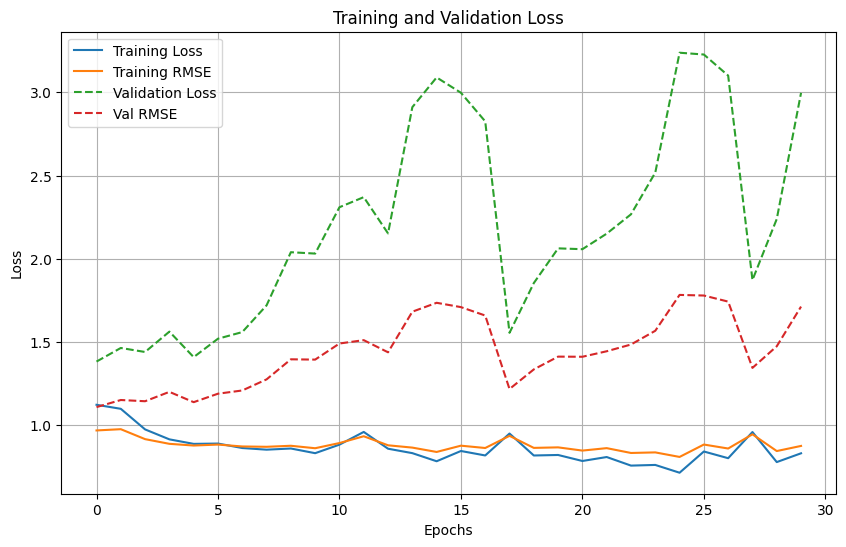

In [65]:
plot_loss(trained_model1)

plot_predictions

The plot_predictions1 function is designed to evaluate and visualize the performance of a machine learning model. It generates predictions using the model, reverses any scaling transformations applied to the data, and plots the predictions against the actual values. Additionally, it computes the Mean Squared Error (MSE) to quantify the model’s prediction error.

In [91]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end= 2000):
  """
    Generates predictions using the model, reverses the scaling transformation,
    plots the predictions against actual values, and calculates the Mean Squared Error (MSE).

    Returns:
    tuple: A tuple containing the following:
        - DataFrame with the first few rows of predictions and actuals.
        - DataFrame with the last few rows of predictions and actuals.
        - Mean Squared Error (MSE) between the reversed predictions and actuals.
"""

  # Generate predictions
  predictions = model.predict(X).flatten()

  # Inverse transform predictions and actual values
  pred_revr = sc2.inverse_transform(predictions.reshape(-1,1))
  actul_revr = sc2.inverse_transform([y])

  # Create a DataFrame for predictions and actual values
  df = pd.DataFrame(data={'Predictions': pred_revr.flatten(), 'Actuals':actul_revr.flatten()})

  # Plotting
  plt.figure(figsize=(12, 8))
  plt.plot(df['Predictions'][start:end], label='Predictions')
  plt.plot(df['Actuals'][start:end], label='Actuals')

  # Adding labels and title
  plt.title('Model Predictions vs Actual Values')
  plt.xlabel('Timestamp')
  plt.ylabel('Trading Volume (Target Variable)')

  # Adding legend
  plt.legend(loc='best')
  plt.show()
  
  # Calculate and print Mean Squared Error
  mse_value = mse(predictions, y)
  print(f'The Mean Squared Error is: {mse_value}')

  return

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


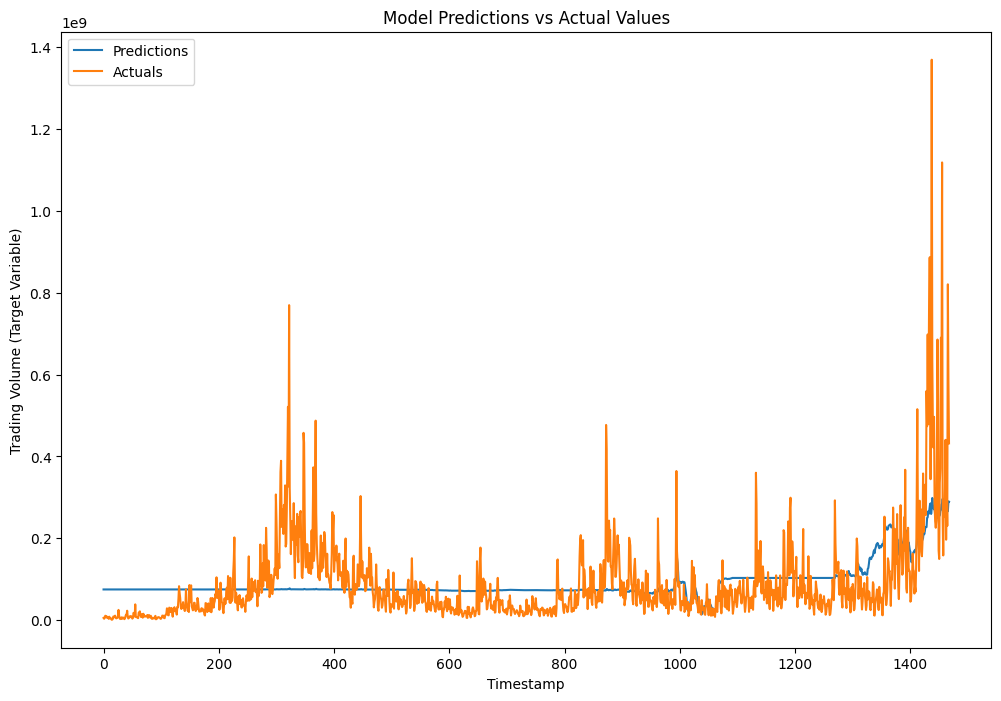

The Mean Squared Error is: 0.6492799569668263


In [92]:
plot_predictions(model1, X1_train, y1_train) # Evaluate the performance of a trained model and visualize on a specific subset of the training data.

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


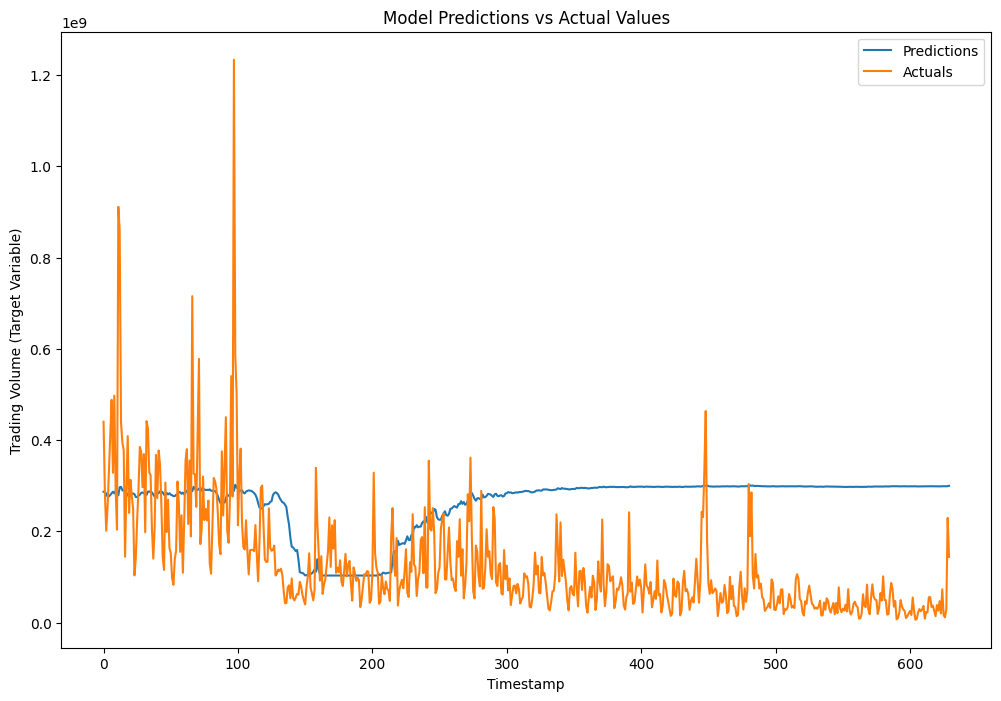

The Mean Squared Error is: 2.9340751188678063


In [93]:
plot_predictions(model1, X1_val, y1_val, start=0, end=800) # Evaluate the performance of a trained model and visualize on a specific subset of the validation data.

### Setting up a GRU(64) model

In [79]:
# Defining the model

# model2 = Sequential()
# model2.add(GRU(64, input_shape=(5, 321), kernel_regularizer=l2(0.001)))
# model2.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
# model2.add(Dense(1, activation='linear'))

model2 = Sequential()
model2.add(InputLayer((X1.shape[1], X1.shape[2])))
model2.add(GRU(64, kernel_regularizer=l2(0.001)))
model2.add(Dense(12, 'relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        74,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,097 (293.35 KB)

 Trainable params: 75,097 (293.35 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Setting up the model checkpoint
cp2 = ModelCheckpoint('model2/model_checkpoint.keras', save_best_only=True)

# Compiling the model
model2.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0008),
    metrics=[RootMeanSquaredError()]
              )

In [81]:
# Fitting the model
trained_model2 = model2.fit(
    X1_train, y1_train,
    validation_data=(X1_val, y1_val),
    epochs=20,
    verbose=True,
    callbacks=[cp2]
         )

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.2090 - root_mean_squared_error: 0.9733 - val_loss: 2.5306 - val_root_mean_squared_error: 1.5126
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7735 - root_mean_squared_error: 0.7305 - val_loss: 3.5781 - val_root_mean_squared_error: 1.8318
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6798 - root_mean_squared_error: 0.6781 - val_loss: 3.7135 - val_root_mean_squared_error: 1.8728
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6710 - root_mean_squared_error: 0.6830 - val_loss: 2.4991 - val_root_mean_squared_error: 1.5186
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6142 - root_mean_squared_error: 0.6472 - val_loss: 1.1580 - val_root_mean_squared_error: 0.9878
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5200 - root_mean_squared_error: 0.5824 - val_loss: 0.9979 - val_root_mean_squared_error: 0.9087
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.558

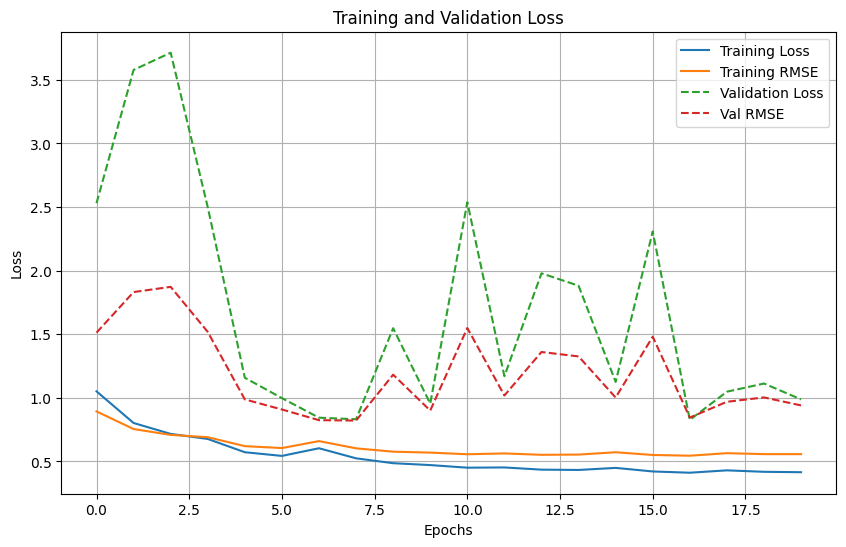

In [82]:
plot_loss(trained_model2)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


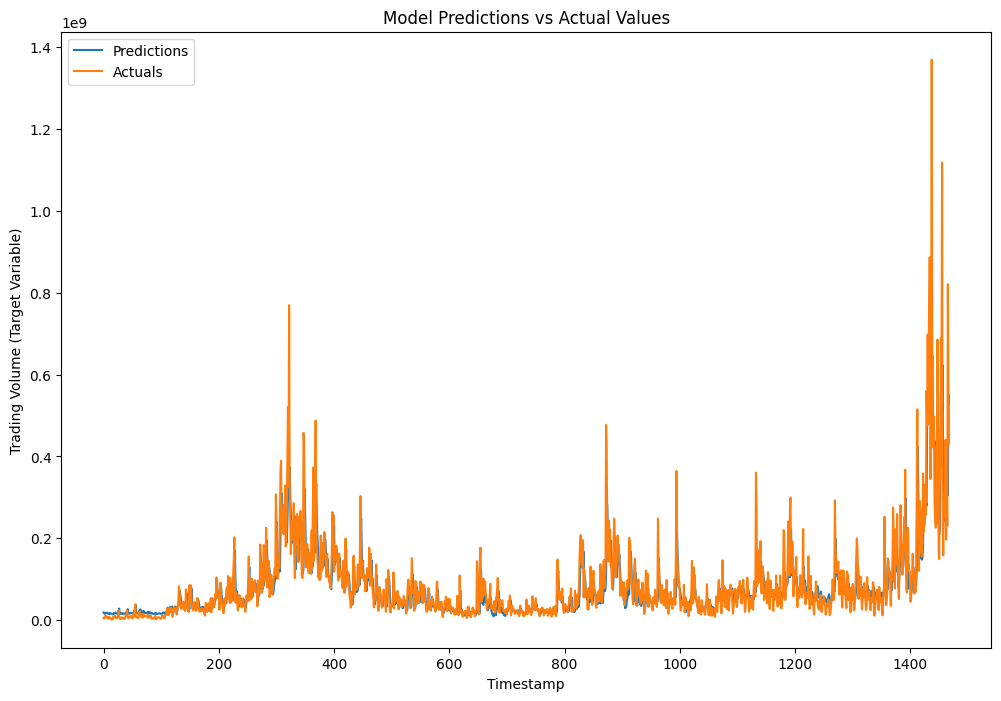

The Mean Squared Error is: 0.2788806353181579


In [94]:
plot_predictions(model2, X1_train, y1_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


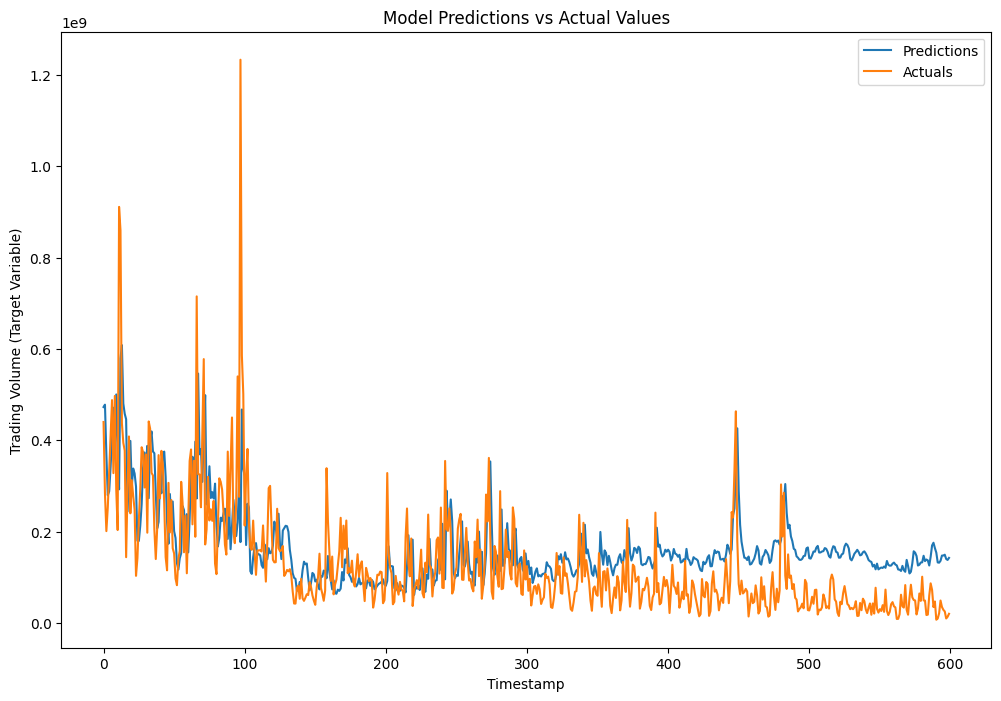

The Mean Squared Error is: 0.8848310533998677


In [95]:
plot_predictions(model2, X1_val, y1_val, start=0, end=600)